In [1]:
import numpy as np
import pandas as pd

# Load Dataset

In [2]:
dataset = pd.read_csv('data_temp/100_gauge.csv', index_col=False)

In [4]:
split_index = int(0.7 * len(dataset))
X = dataset.drop(['prec'], axis=1)
y = dataset['prec']
X_train, X_test, y_train, y_test = X.iloc[:split_index], X.iloc[split_index:], y.iloc[:split_index], y.iloc[split_index:]

In [8]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import pandas as pd
import matplotlib.pyplot as plt


# Create Basic Linear Regression model

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
linear_model = LinearRegression()

# Trainiere das Modell
linear_model.fit(X_train, y_train)

LinearRegression()

In [14]:
y_pred = linear_model.predict(X_test)

# Berechne den Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Error: 20.921511658112397
Root Mean Squared Error: 4.5740038979118065


In [12]:
results_df = pd.DataFrame({'ID': X_test['ID'], 'Timestamp': X_test['Timestamp'],  'Actual': y_test, 'Predicted': y_pred})

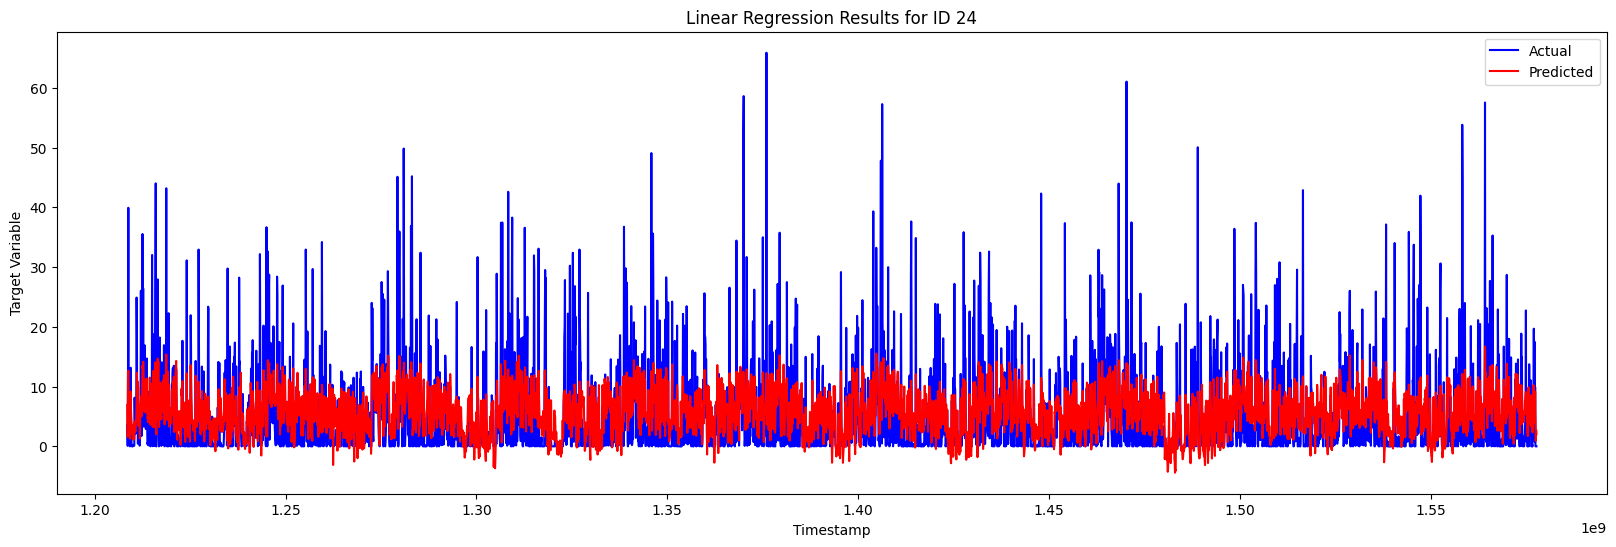

In [13]:
specific_id = 24
filtered_results = results_df[results_df['ID'] == specific_id]

plt.figure(figsize=(20, 6))

# Plot für unterschiedliche Zeitpunkte mit Linien
plt.plot(filtered_results['Timestamp'], filtered_results['Actual'], color='blue', label='Actual')
plt.plot(filtered_results['Timestamp'], filtered_results['Predicted'], color='red', label='Predicted')
plt.xlabel('Timestamp')
plt.ylabel('Target Variable')
plt.title(f'Linear Regression Results for ID {specific_id}')
plt.legend()
plt.show()

# Plot Feature importance

In [18]:
coefficients = linear_model.coef_

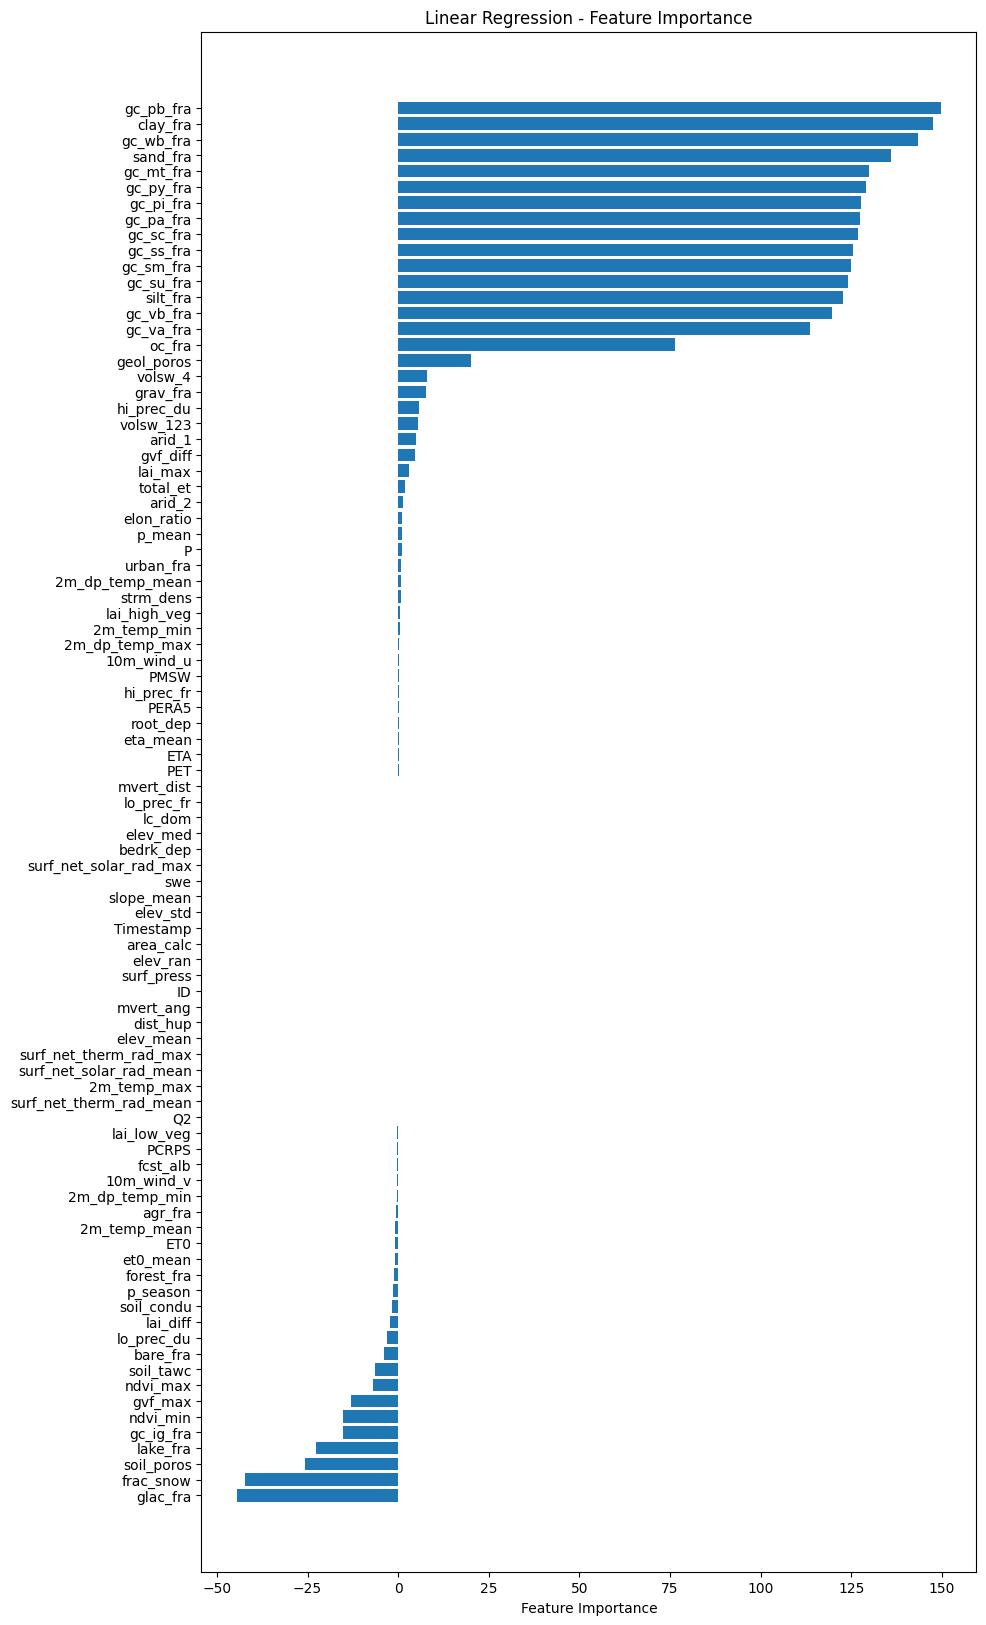

In [19]:
import matplotlib.pyplot as plt

# Sortiere die Features nach ihrer Wichtigkeit
sorted_indices = coefficients.argsort()
sorted_features = X_train.columns[sorted_indices]
plt.figure(figsize=(10, 20))

# Erstelle ein Balkendiagramm
plt.barh(range(len(coefficients)), coefficients[sorted_indices])
plt.yticks(range(len(coefficients)), sorted_features)
plt.xlabel('Feature Importance')
plt.title('Linear Regression - Feature Importance')
plt.show()

# Use Grid Search for find best Hyperparameters  

In [67]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Definiere die Hyperparameter für die Grid-Suche
param_grid = {
    'scaler__with_mean': [True, False],  # Beispiel für einen Scaler-Hyperparameter
    'regressor__fit_intercept': [True, False],
    'regressor__positive': [True, False]  # Beispiel für einen gültigen Regressor-Hyperparameter
}

# Grid-Suche
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Beste Hyperparameter ausgeben
print("Beste Hyperparameter:", grid_search.best_params_)

Beste Hyperparameter: {'regressor__fit_intercept': True, 'regressor__positive': False, 'scaler__with_mean': True}


In [68]:
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Mache Vorhersagen auf dem Testdatensatz
y_pred = best_model.predict(X_test)

# Auswertung
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Error: 20.92141521495363
Root Mean Squared Error: 4.573993355368329


In [70]:
results_df = pd.DataFrame({'ID': X_test['ID'], 'Timestamp': X_test['Timestamp'],  'Actual': y_test, 'Predicted': y_pred})

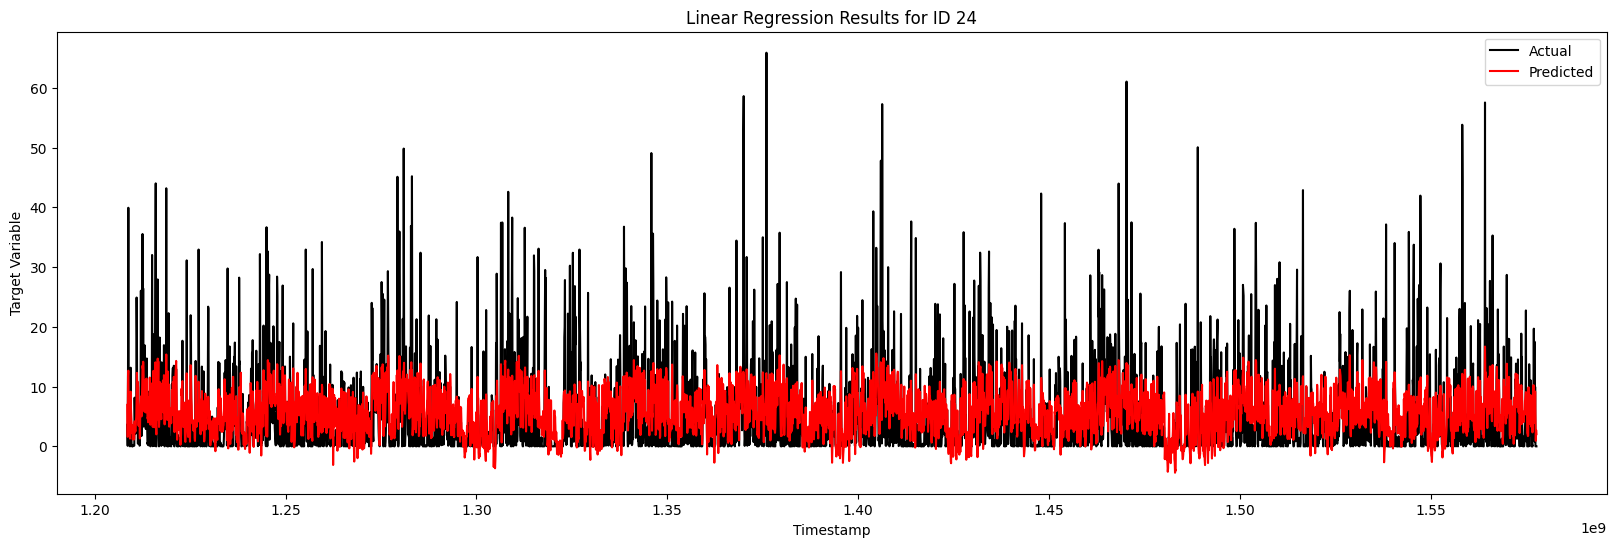

In [71]:
specific_id = 24
filtered_results = results_df[results_df['ID'] == specific_id]

plt.figure(figsize=(20, 6))

# Plot für unterschiedliche Zeitpunkte mit Linien
plt.plot(filtered_results['Timestamp'], filtered_results['Actual'], color='black', label='Actual')
plt.plot(filtered_results['Timestamp'], filtered_results['Predicted'], color='red', label='Predicted')
plt.xlabel('Timestamp')
plt.ylabel('Target Variable')
plt.title(f'Linear Regression Results for ID {specific_id}')
plt.legend()
plt.show()